## INFX574 Problem Set 4 Due: Wed, May16, 5:30
<br> __Yourname: Xinyu Li__ 

#### Introduction
<br>This problem set is long but I hope it is still doable :-) It revolves around classi cation, logistic regression and regularization. At the end, you are asked to construc a ROC curve.

<br>Please submit a) your code (notebooks) and b) the results in a  nal output form (html or pdf). I recommend to use scikit-learn.linear_model .

<br> You are welcome to answer some of the questions on paper but please include the result as an image in your  nal  le. Note that you can easily include images in both notebooks and .rmd besides of the code, both are just markdown documents.

<br> Working together is fun and useful but you have to submit your own work. Discussing the solutions and problems with your classmates is all right but do not copy-paste their solution! Please list all your collaborators below:
1. 
2. 


#### Wisconsin Breast Cancer Dataset
<br> You will work with Wisconsin Breast Cancer Dataset (WBCD), available at UCI Machine Learning Repos-itory. You can download it from the internet but rather use the  les wdbc.csv.bz2 and wdbc_doc.txt from canvas (under files/data ) where I have added the variable names to the data. The  rst  le is the csv with variable names, the second one a brief description of the data.

<br> The data includes diagnosis of the tumor with  M  meaning cancer (malignant) and  B  no cancer (benign), and 10 features, describing physical properties of cell nuclei from biopsy samples. Each feature is represented three times, once for mean, once for standard error, and once for the worst values. Your task is to predict diagnosis based on this data.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn as sklearn

%matplotlib inline

### 1.  Explore the data 
__1.	Load the data. You may drop id or just ignore it in the rest of your analysis.__

In [2]:
# loading the data
wbc = pd.read_csv('../../data/wdbc.csv.bz2')

# drop the id
wbc = wbc.drop(['id'], axis=1)

# replace M B for diagnosis
wbc = wbc.replace({'M': 1, 'B': 0})

# basic info about the data
print (wbc.keys())
print (wbc.shape)
print(wbc.dtypes)

#check the first 10 rows to see what's the data like
wbc.head(10)

Index(['diagnosis', 'radius.mean', 'texture.mean', 'perimeter.mean',
       'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean',
       'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se',
       'texture.se', 'perimeter.se', 'area.se', 'smoothness.se',
       'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se',
       'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst',
       'area.worst', 'smoothness.worst', 'compactness.worst',
       'concavity.worst', 'concpoints.worst', 'symmetry.worst',
       'fracdim.worst'],
      dtype='object')
(569, 31)
diagnosis              int64
radius.mean          float64
texture.mean         float64
perimeter.mean       float64
area.mean            float64
smoothness.mean      float64
compactness.mean     float64
concavity.mean       float64
concpoints.mean      float64
symmetry.mean        float64
fracdim.mean         float64
radius.se            float64
texture.se           float64
perimeter.s

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


__2. Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the diagnosis and the corresponding feature. You may include more statistics you consider useful.__

In [28]:
# sum up the null values as number of missing
null_values = (pd.isnull(wbc)).sum()

# transpose the array and keep only mean and standard deviation and range
summary = wbc.describe().T[['count', 'mean', 'std', 'min', 'max']]

# order by index from a to z
summary = summary.sort_index()

# add the null value column
summary = summary.assign(null = null_values)

print(summary)
wbc.corr()

                   count        mean         std         min         max  null
area.mean          569.0  654.889104  351.914129  143.500000  2501.00000     0
area.se            569.0   40.337079   45.491006    6.802000   542.20000     0
area.worst         569.0  880.583128  569.356993  185.200000  4254.00000     0
compactness.mean   569.0    0.104341    0.052813    0.019380     0.34540     0
compactness.se     569.0    0.025478    0.017908    0.002252     0.13540     0
compactness.worst  569.0    0.254265    0.157336    0.027290     1.05800     0
concavity.mean     569.0    0.088799    0.079720    0.000000     0.42680     0
concavity.se       569.0    0.031894    0.030186    0.000000     0.39600     0
concavity.worst    569.0    0.272188    0.208624    0.000000     1.25200     0
concpoints.mean    569.0    0.048919    0.038803    0.000000     0.20120     0
concpoints.se      569.0    0.011796    0.006170    0.000000     0.05279     0
concpoints.worst   569.0    0.114606    0.065732    

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius.mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture.mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter.mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area.mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness.mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness.mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity.mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concpoints.mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry.mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


__3.	Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the diagnosis.__

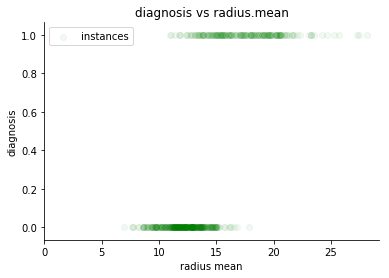

In [22]:
# diagnosis vs radius.mean
plt.scatter(wbc['radius.mean'], wbc['diagnosis'], alpha = 0.05, color = 'green', marker='o', label = 'instances')
plt.xlim(0,)
plt.xlabel('radius mean')
plt.ylabel('diagnosis')
ax = plt.subplot(111)
# Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#set title
plt.title('diagnosis vs radius.mean')
#show legend
plt.legend(loc = 'best')

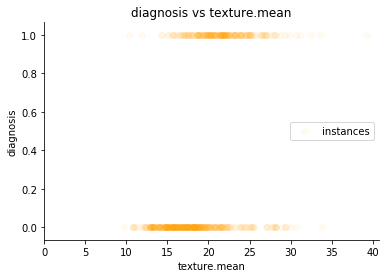

In [35]:
# diagnosis vs texture.mean
plt.scatter(wbc['texture.mean'], wbc['diagnosis'], alpha = 0.05, color = 'orange', marker='o', label = 'instances')
plt.xlim(0,)
plt.xlabel('texture.mean')
plt.ylabel('diagnosis')
ax = plt.subplot(111)
# Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#set title
plt.title('diagnosis vs texture.mean')
#show legend
plt.legend(loc = 'best')

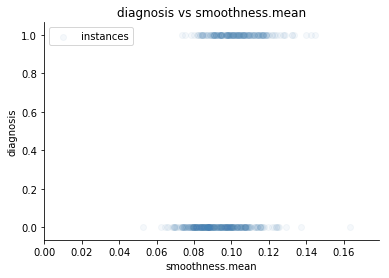

In [29]:
# diagnosis vs smoothness.mean
plt.scatter(wbc['smoothness.mean'], wbc['diagnosis'], alpha = 0.05, color = 'steelblue', marker='o', label = 'instances')
plt.xlim(0,)
plt.xlabel('smoothness.mean')
plt.ylabel('diagnosis')
ax = plt.subplot(111)
# Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#set title
plt.title('diagnosis vs smoothness.mean')
#show legend
plt.legend(loc = 'best')

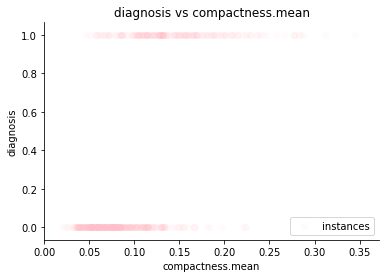

In [31]:
# diagnosis vs compactness.mean
plt.scatter(wbc['compactness.mean'], wbc['diagnosis'], alpha = 0.05, color = 'pink', marker='o', label = 'instances')
plt.xlim(0,)
plt.xlabel('compactness.mean')
plt.ylabel('diagnosis')
ax = plt.subplot(111)
# Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#set title
plt.title('diagnosis vs compactness.mean')
#show legend
plt.legend(loc = 'best')

### 2.	Decision Boundary
<br>The rest task is to plot the decision boundary by kNN and by logistic regression. You will also play a little with feature engineering.

<br>If you are uncertain what is decision boundary, I recommend to consult James et al. (2015) book Section 2. For instance, Figure 2.13 on p38 depicts a 2D classi cation case where certain X1, X2 values are classified as orange and others as blue. Decision boundary is the dashed winding line that separates these two regions.

<br>There are two broad strategies to plot it. In any case, you have  rst to estimate (train) your model. Thereafter you have to predict the classes (cancer/no cancer here) on a regular dense grid that covers the parameter space (this is the small blue/orange dots on  gure 2.13). Afterwards you can either plot your predicted values with a certain color code, or alternatively, say, set predicted M = 1 and predicted B = 0, and make a contour plot for a single contour at level 0.5. You may also combine these both methods.

<br>We ignore training/testing/over tting issues for now.

#### 2.1	kNN Case
<br>First, let's explore the decision boundary using kNN.
<br>Pick two features. I recommend to use a few that show relative strong correlation with diagnosis. Feel free to use a combination you already plotted above.

__ 1.	Predict the diagnosis on a grid (say, 100x100) that covers the range of the explanatory variables. Use kNN with k = 3..7 (pick just one value). This gives you 100x100 predicted diagnoses.__

Note: if your features are of very di erent scale, you should either scale these into a roughly equal scale, or use a metric that does this with you. Consult James et al. (2015, p 217).

__2.	Plot the actual data and the decision boundary on the same plot. Ensure that actual observations and predictions are clearly distinguishable, and that one can easily understand the color code.__

__3.	Describe your observations. How good is kNN in picking up the actual shape? Does it also pick up noise?__

Note: unless you do cross-validation, you cannot know if the model picks up noise (over t). Here I just ask your best judgement, not any formal analysis.

#### 2.2	Logistic Regression
Now repeat the process above by logistic regression. Pick the same features as what you used for k-NN above.
__1.	Fit a logistic regression model with these two features.__

__2.	Predict the diagnosis on a similar grid. . .__

__3. . . . and create a similar plot.__

__4. Describe your observations. How does the result for kNN compare to that for Logistic Regression?__

#### 2.3	Feature Engineering
So far you were using just two of the existing features in the data. However, now let's create a few more.
<br>__1.	Use these two features to compute some new ones. Let's denote your original features by x and y.Examples you may create include: x2, y2, x y, 1(x > 5), 1(y < 1) x2, log x . . . You can use all sorts of mathematical operations as long as a) you only use x and y, not other features, and b) the original and the engineered features remain linearly independent (they are, unless you create features like x +    y).__

__2.	Fit a logistic regression model. However, this time pick both x, y, and some of your engineered features.__

__3.	Create the decision boundary plot.__

__4.	Comment on the shape of the boundary. What do you think, how well can you capture the actual boundary? What about over tting? (Again, I ask about your judgement, not about any formal analysis).__

__5.	Repeat the exercise a few times where you pick/engineer di erent new features, and try to get as reasonable boundary as you can.__

<br>As above, I am asking  reasonable  boundary in the sense of your best judgement. No actual cross validation is necessary.

<br>Note: I have mixed experience with scikit-learn.linear_model.LogisticRegression . It occasionally appears the default convergence tolerance is far too big, and the default liblinear solver too imprecise. Setting tolerance to 10-12 and solver to lbfgs improved the results for me, but did not make it  awless.

### 3	Use the full data
<br>Finally, we'll get serious. We'll use full data set in the logistic regression, include regularization, and cross-validate our results.

#### 3.1	Cross Validation
<br>Here your task is to Write code to do n-fold cross validation. Note: I expect you to implement CV here, not to use any canned version. Consult James et al. (2015, Section 5.1.3).

__ 1.	You should do k-fold CV (k > 10) with the following tasks:
<br>(a)	Fit logistic regression model on training data using all existing features. You may also add your engineered features if you wish.
<br>(b)	Calculate accuracy, precision and recall on the validation data.__

__2.	Report the average accuracy, precision, and recall over your CV runs.__

#### 3.2	Regularization
<br>Your (almost) last task is to  nd the best regularization parameter using CV algorithm you created above. Consult James et al. (2015, Section 6.2) for introduction to regularization methods (ridge and lasso). I expect you to play with regularization parameters in existing software, such as scikit-learn.linear_model , not to implement it yourself.

__ 1. Pick a type of regularization (lasso, ridge, elastic net).__

__2.	Create a wide list of regularization parameters. And I mean wide, for instance ranging from 10-6 to 106. Pick a number of values inside this range.__

__3.	For each in this range, repeat the CV process in exercise 3.1 above. Compute accuracy, precision, recall.__
<br>Warning: this may be slow, so I recommend you to start with only a few values. When you algorithm works well, increase the number of values.

__4.	Report the results as a function of  . This may be in the form of a table or a graph.__

__5.	Report the best regularization parameters, and the best results.__

### 4	ROC curve: which estimator is the best
<br>Your last task is to create the ROC curve of several estimators. Consult James et al. (2015, p 148) for what is the ROC curve. You have to compare a) k-NN, b) Naive Bayes, and c) logistic regression estimators.

<br> In case of k-NN, you should pick a few di erent k values (say, 1, 5 and 25). In case of Naive Bayes, you may use use sklearn.naive_bayes.GaussianNB . Feel free to use it  as is , no calibration necessary.

__1.	Split your data into testing and training sets (you may use sklearn.model_selection.train_test_split ), say 1/3 for testing. Use all the features in the original data.__

__2.	Using your training data, estimate (a few) k-NN models, Naive Bayes model, and logistic regression.__
<br>Notes: in case of k-NN, you should use scaled features. In case of logistic regression, use the optimal regularization parameter value you found in 3.2.

__3.	For each of the models, predict the probabilites on the test data.__
<br>Note: you have to use predict_proba, not predict for logistic and NB regression.

__4.	Pick a number of thresholds between 0 and 1 (for instance, 0, 0.1, 0.2, ...). For each model and each threshold, treat your predictions to be 1 if it it's probability is at least as big as the threshold.__

__5.	Based on these predictions, compute false positive rate and true positive rate.__

__6.	Plot these rates for each threshold and model.__

__7.	Comment your results. Which model is the best?__